In [2]:
import os
import random
import glob
import PIL
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import nibabel as nib
from skimage.transform import rotate
from skimage.util import montage

from sklearn.preprocessing import MinMaxScaler

# Dataset Properties

## Inputs

The dataset contains images captured in four modalities:

- **0**: FLAIR
- **1**: T1w
- **2**: t1gd
- **3**: T2w

You can retrieve these modalities from the last dimension of the `.nii` file. Each modality provides different information useful for medical image analysis.

## Labels

The dataset features four distinct labels for segmentation:

- **0**: background
- **1**: edema
- **2**: non-enhancing tumor
- **3**: enhancing tumour

These labels represent different anatomical structures or abnormalities in the brain, aiding in the identification and segmentation of brain tumors.

In [21]:
# Load the .nii.gz file
image_number = '227'
file_path = f'../BrainTumourData/imagesTr/BRATS_{image_number}.nii.gz'  # Replace with the actual file path
mask_path = f'../BrainTumourData/labelsTr/BRATS_{image_number}.nii.gz'  # Replace with the actual file path
img = nib.load(file_path)
mask = nib.load(mask_path)

# Get the image data as a NumPy array
data_flair = img.get_fdata()[:,:,:, 0]
data_t1w = img.get_fdata()[:,:,:, 1]
data_t1gd = img.get_fdata()[:,:,:, 2]
data_t2w = img.get_fdata()[:,:,:, 3]
data_mask = mask.get_fdata()

print("Shape: ", data_flair.shape)
print("Dtype: ", data_flair.dtype)


Shape:  (240, 240, 155)
Dtype:  float64


In [22]:
print("Min: ", data_flair.min())
print("Max: ", data_flair.max())

Min:  0.0
Max:  2217.0


In [23]:
scaler = MinMaxScaler()

data_flair = scaler.fit_transform(data_flair.reshape(-1, data_flair.shape[-1])).reshape(data_flair.shape)
data_t1w = scaler.fit_transform(data_t1w.reshape(-1, data_t1w.shape[-1])).reshape(data_t1w.shape)
data_t1gd = scaler.fit_transform(data_t1gd.reshape(-1, data_t1gd.shape[-1])).reshape(data_t1gd.shape)
data_t2w = scaler.fit_transform(data_t2w.reshape(-1, data_t2w.shape[-1])).reshape(data_t2w.shape)

In [24]:
print("Min: ", data_flair.min())
print("Max: ", data_flair.max())

Min:  0.0
Max:  1.0


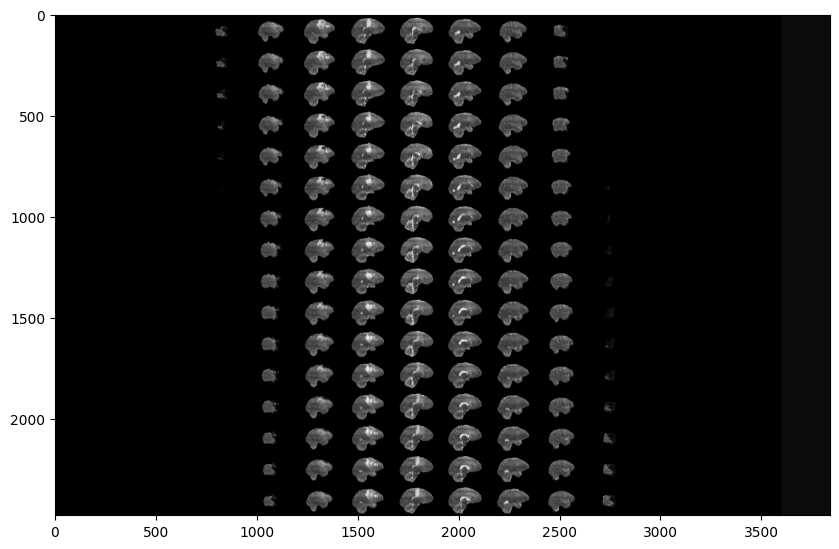

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(rotate(montage(data_t2w[:,:,:]), 90, resize=True), cmap ='gray')

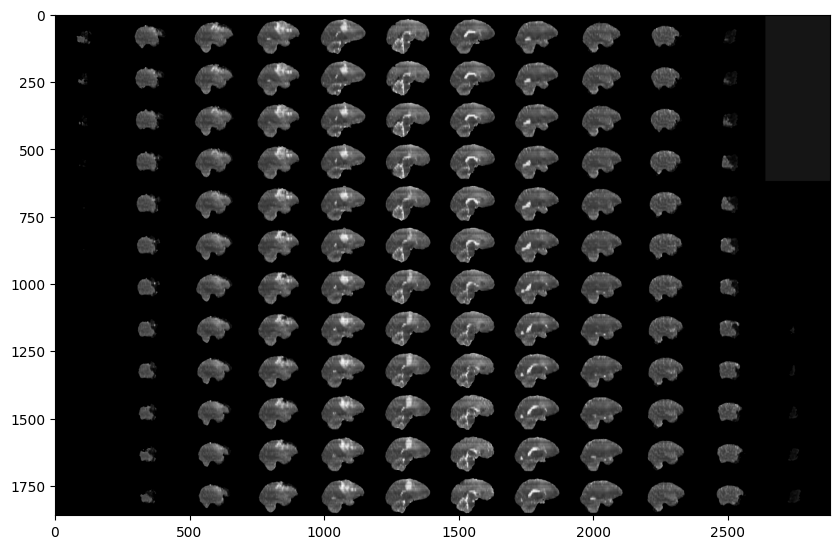

In [26]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(rotate(montage(data_t2w[50:-50,:,:]), 90, resize=True), cmap ='gray')

Slice Number: 95


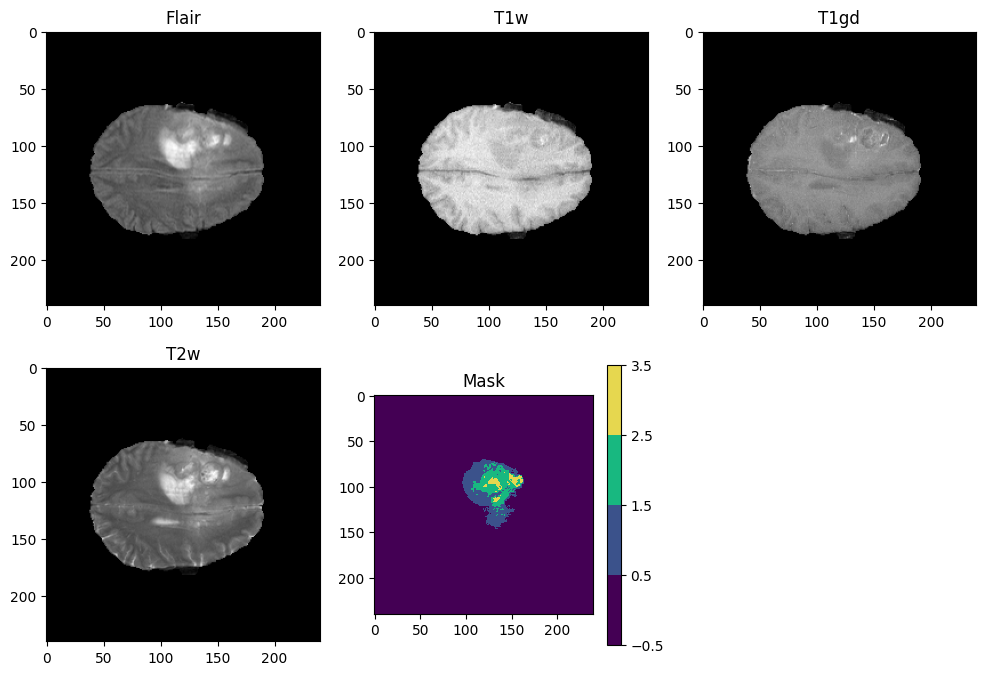

In [32]:
slice = 95

print("Slice Number: " + str(slice))

plt.figure(figsize=(12, 8))

# FLAIR
plt.subplot(2, 3, 1)
plt.imshow(data_flair[:,:,slice], cmap='gray')
plt.title('Flair')

# T1w
plt.subplot(2, 3, 2)
plt.imshow(data_t1w[:,:,slice], cmap='gray')
plt.title('T1w')

# t1gd
plt.subplot(2, 3, 3)
plt.imshow(data_t1gd[:,:,slice], cmap='gray')
plt.title('T1gd')

# T2w
plt.subplot(2, 3, 4)
plt.imshow(data_t2w[:,:,slice], cmap='gray')
plt.title('T2w')


# Mask
cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)
plt.subplot(2, 3, 5)
plt.imshow(data_mask[:,:,slice], cmap=cmap, norm=norm)
plt.colorbar()
plt.title('Mask')
plt.show()

Slice number: 95


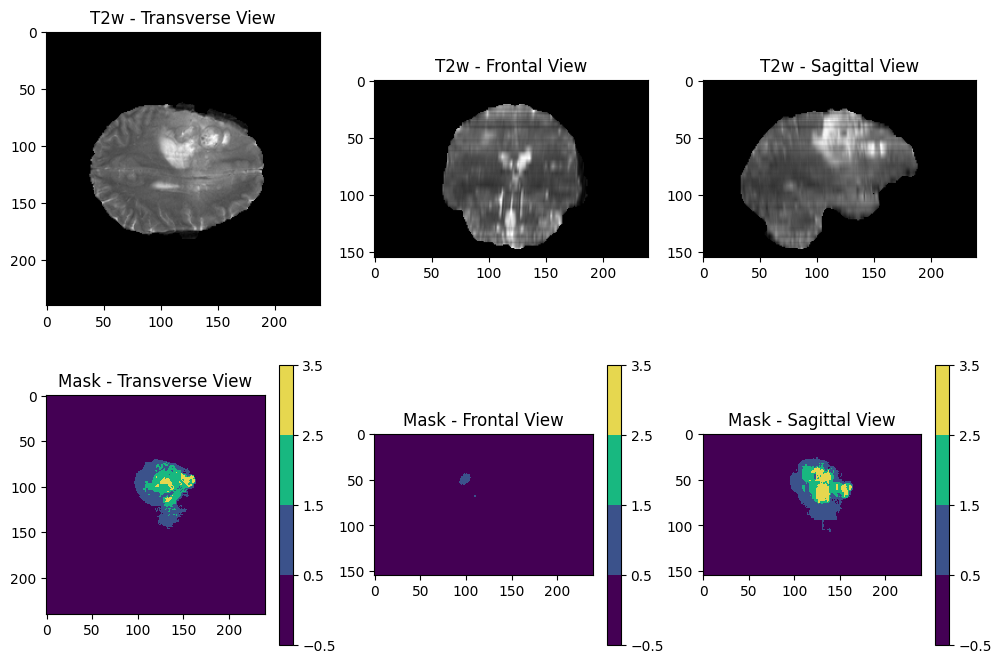

In [34]:
print("Slice number: " + str(slice))

plt.figure(figsize=(12, 8))

# T1gd - Transverse View
plt.subplot(2, 3, 1)
plt.imshow(data_t2w[:,:,slice], cmap='gray')
plt.title('T2w - Transverse View')

# T1gd - Frontal View
plt.subplot(2, 3, 2)
plt.imshow(rotate(data_t2w[:,slice,:], 90, resize=True), cmap='gray')
plt.title('T2w - Frontal View')

# T1gd - Sagittal View
plt.subplot(2, 3, 3)
plt.imshow(rotate(data_t2w[slice,:,:], 90, resize=True), cmap='gray')
plt.title('T2w - Sagittal View')

# Mask
cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

plt.subplot(2, 3, 4)
plt.imshow(data_mask[:,:,slice], cmap=cmap, norm=norm)
plt.colorbar()
plt.title('Mask - Transverse View')

plt.subplot(2, 3, 5)
plt.imshow(rotate(data_mask[:,slice,:], 90, resize=True), cmap=cmap, norm=norm)
plt.colorbar()
plt.title('Mask - Frontal View')

plt.subplot(2, 3, 6)
plt.imshow(rotate(data_mask[slice,:,:], 90, resize=True), cmap=cmap, norm=norm)
plt.colorbar()
plt.title('Mask - Sagittal View')
plt.show()

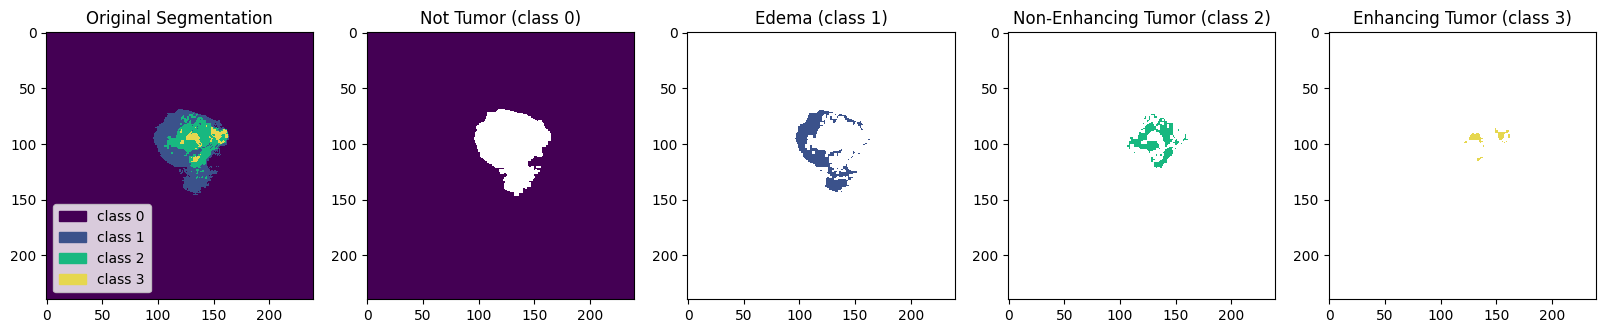

In [37]:
# Isolation of class 0
seg_0 = data_mask.copy()
seg_0[seg_0 != 0] = np.nan

# Isolation of class 1
seg_1 = data_mask.copy()
seg_1[seg_1 != 1] = np.nan

# Isolation of class 2
seg_2 = data_mask.copy()
seg_2[seg_2 != 2] = np.nan

# Isolation of class 4
seg_3 = data_mask.copy()
seg_3[seg_3 != 3] = np.nan

# Define legend
class_names = ['class 0', 'class 1', 'class 2', 'class 3']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(data_mask[:,:, slice], cmap=cmap, norm=norm)
ax[0].set_title('Original Segmentation')
ax[0].legend(handles=legend, loc='lower left')

ax[1].imshow(seg_0[:,:, slice], cmap=cmap, norm=norm)
ax[1].set_title('Not Tumor (class 0)')

ax[2].imshow(seg_1[:,:, slice], cmap=cmap, norm=norm)
ax[2].set_title('Edema (class 1)')

ax[3].imshow(seg_2[:,:, slice], cmap=cmap, norm=norm)
ax[3].set_title('Non-Enhancing Tumor (class 2)')

ax[4].imshow(seg_3[:,:, slice], cmap=cmap, norm=norm)
ax[4].set_title('Enhancing Tumor (class 3)')

plt.show()